# Linear regression

1.Split data

2.Cluster data

3.Build regression models

4.Test data

i)classify test data accordingly

ii)predict using corresponding regression model according to classification

5.get mean square error/root mean square error

In [702]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

In [703]:
df = pd.read_csv('insurance.csv')
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [704]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Data Cleanup

In [705]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [706]:
df.isnull().values.any() # check if any row is empty (NA)

False

In [707]:
df.loc[df.duplicated(keep=False),:] # check for duplicated rows # rows 195 and 581 are repeated

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [708]:
df.shape # array dimension before dropping duplicate

(1338, 7)

In [709]:
df=df.drop_duplicates(keep='first') # drop the second duplicate,keep the first duplciate

In [710]:
df.shape # array dimension after dropping duplicate

(1337, 7)

In [711]:
print(df.sex.unique()) # get unique values in these 3 columns for mapping
print(df.smoker.unique())
print(df.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [712]:
cleanup_map={"sex":{"female":0,"male":1},
             "smoker":{"no":0,"yes":1}}
             #"region":{"southwest":1,"southeast":2,"northwest":3,"northeast":4}}
df.replace(cleanup_map,inplace=True)

In [713]:
df['southwest'] = np.where(df['region'] == 'southwest', 1, 0)
df['southeast'] = np.where(df['region'] == 'southeast', 1, 0)
df['northwest'] = np.where(df['region'] == 'northwest', 1, 0)
df['northeast'] = np.where(df['region'] == 'northeast', 1, 0)

In [714]:
df.head()

,age,sex,bmi,children,smoker,region,charges,southwest,southeast,northwest,northeast
0,19,0,27.900,0,1,southwest,16884.92400,1,0,0,0
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0,0
3,33,1,22.705,0,0,northwest,21984.47061,0,0,1,0
4,32,1,28.880,0,0,northwest,3866.85520,0,0,1,0


In [715]:
df=df.drop('region',axis=1) 
df.head()

,age,sex,bmi,children,smoker,charges,southwest,southeast,northwest,northeast
0,19,0,27.900,0,1,16884.92400,1,0,0,0
1,18,1,33.770,1,0,1725.55230,0,1,0,0
2,28,1,33.000,3,0,4449.46200,0,1,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0


In [716]:
# split data
x=df.drop('charges',axis=1)
y=df.charges
x_train,x_test,y_train, y_test = train_test_split(x, y, random_state=0)

In [717]:
x_train

,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast
1075,32,0,29.590,1,0,0,1,0,0
131,61,0,22.040,0,0,0,0,0,1
15,19,1,24.600,1,0,1,0,0,0
825,64,0,31.825,2,0,0,0,0,1
1137,26,0,22.230,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
764,45,0,25.175,2,0,0,0,0,1
836,36,1,31.500,0,0,1,0,0,0
1217,29,1,37.290,2,0,0,1,0,0
559,19,1,35.530,0,0,0,0,1,0


In [718]:
y_train

1075     4562.84210
131     13616.35860
15       1837.23700
825     16069.08475
1137     3176.28770
           ...     
764      9095.06825
836      4402.23300
1217     4058.11610
559      1646.42970
685     11244.37690
Name: charges, Length: 1002, dtype: float64

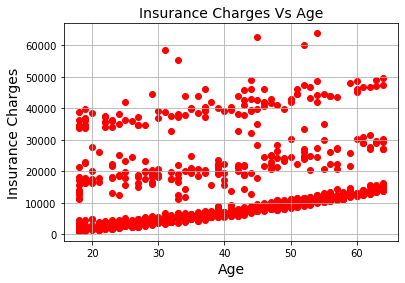

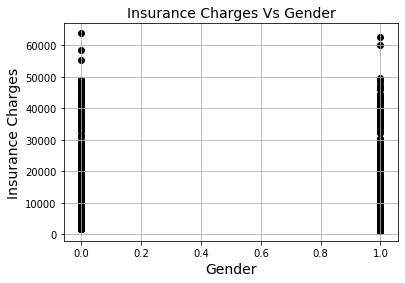

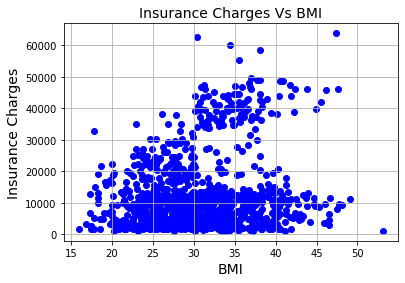

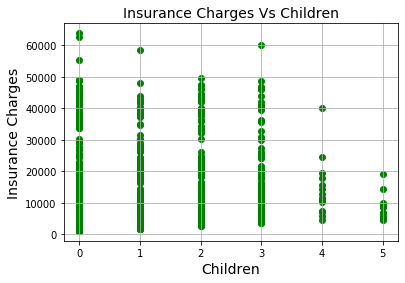

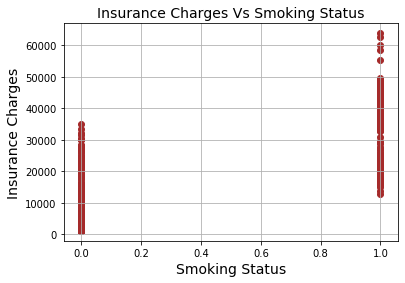

In [719]:
plt.scatter(x_train['age'], y_train, color='red')
plt.title('Insurance Charges Vs Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(x_train['sex'], y_train, color='black')
plt.title('Insurance Charges Vs Gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(x_train['bmi'], y_train, color='blue')
plt.title('Insurance Charges Vs BMI', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(x_train['children'], y_train, color='green')
plt.title('Insurance Charges Vs Children', fontsize=14)
plt.xlabel('Children', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(x_train['smoker'], y_train, color='brown')
plt.title('Insurance Charges Vs Smoking Status', fontsize=14)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

#plt.scatter(x_train['northeast'], y_train, color='red')
#plt.scatter(x_train['northwest'], y_train, color='blue')
#plt.scatter(x_train['southeast'], y_train, color='green')
#plt.scatter(x_train['southwest'], y_train, color='yellow')
#plt.title('Insurance Charges Vs Region', fontsize=14)
#plt.xlabel('Region', fontsize=14)
#plt.ylabel('Insurance Charges', fontsize=14)
#plt.grid(True)
#plt.show()

Classify insurance charges vs age into 3 clusters.

In [720]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

x_db_df=pd.DataFrame(y_train)
x_db_df['age']=x_train['age']
print(x_db_df)

#print(x_train['age'])
#print(y_train)
#x_db_df=pd.DataFrame(x_train['age'])
#print(x_db_df)
#x_db_df['charges']=y_train
#print(x_db_df)

          charges  age
1075   4562.84210   32
131   13616.35860   61
15     1837.23700   19
825   16069.08475   64
1137   3176.28770   26
...           ...  ...
764    9095.06825   45
836    4402.23300   36
1217   4058.11610   29
559    1646.42970   19
685   11244.37690   53

[1002 rows x 2 columns]


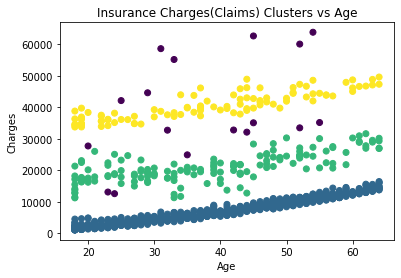

In [721]:
x_db=x_db_df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_db)

# cluster the data
dbscan = DBSCAN(eps=0.25, min_samples = 4)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(x_db[:, 1], x_db[:, 0], c=clusters,)
plt.title('Insurance Charges(Claims) Clusters vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.show()



In [722]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0) # noise samples are -1 in clusters array.
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 3
Number of noise sample = 17


This appears to be a more reasonable clustering outcome. In addition, we could easily exclude outliers with this clustering.

In [723]:
np.unique(clusters)

array([-1,  0,  1,  2], dtype=int64)

In [724]:
clusters[:50]

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,
       -1,  0,  2,  0,  0,  2,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [725]:
clusters.shape

(1002,)

In [726]:
x_train.head()

,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast
1075,32,0,29.590,1,0,0,1,0,0
131,61,0,22.040,0,0,0,0,0,1
15,19,1,24.600,1,0,1,0,0,0
825,64,0,31.825,2,0,0,0,0,1
1137,26,0,22.230,0,0,0,0,1,0


In [727]:
# combine clusters and df
x_train['Cluster']=clusters
x_db_df['Cluster']=clusters

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [728]:
x_train=x_train.merge(y_train.to_frame(), left_index=True, right_index=True)
x_train.head(50)


,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast,Cluster,charges
1075,32,0,29.590,1,0,0,1,0,0,0,4562.84210
131,61,0,22.040,0,0,0,0,0,1,0,13616.35860
15,19,1,24.600,1,0,1,0,0,0,0,1837.23700
825,64,0,31.825,2,0,0,0,0,1,0,16069.08475
1137,26,0,22.230,0,0,0,0,1,0,0,3176.28770
1006,28,1,29.260,2,0,0,0,0,1,0,4438.26340
630,53,1,36.100,1,0,1,0,0,0,0,10085.84600
1188,43,0,25.270,1,1,0,0,0,1,1,21771.34230
1112,48,0,25.850,3,1,0,1,0,0,1,24180.93350
187,30,0,30.900,3,0,1,0,0,0,0,5325.65100


In [729]:
x_db_df.head(50)

,charges,age,Cluster
1075,4562.84210,32,0
131,13616.35860,61,0
15,1837.23700,19,0
825,16069.08475,64,0
1137,3176.28770,26,0
1006,4438.26340,28,0
630,10085.84600,53,0
1188,21771.34230,43,1
1112,24180.93350,48,1
187,5325.65100,30,0


In [730]:
# it can be seen that cluster=2 is high coverage plan, 1 is mid coverage, 0 is low coverage
# now drop the outliers, cluster=-1 i.e. keep rows whose cluster!=-1. We have 17 rows which are outliers.

print(x_train.shape)
x_train=x_train[x_train['Cluster']!=-1]
print(x_train.shape)

(1002, 11)
(985, 11)


In [731]:
#now separate data into high,mid, and low coverage claims.
x_train_high=x_train[x_train['Cluster']==2]
print(x_train_high.head(),x_train_high.shape)

x_train_mid=x_train[x_train['Cluster']==1]
print(x_train_mid.head(),x_train_mid.shape)

x_train_low=x_train[x_train['Cluster']==0]
print(x_train_low.head(),x_train_low.shape)

      age  sex     bmi  children  smoker  southwest  southeast  northwest  \
1301   62    1  30.875         3       1          0          0          1   
82     22    1  37.620         1       1          0          1          0   
252    54    1  34.210         2       1          0          1          0   
263    19    1  36.955         0       1          0          0          1   
271    50    1  34.200         2       1          1          0          0   

      northeast  Cluster      charges  
1301          0        2  46718.16325  
82            0        2  37165.16380  
252           0        2  44260.74990  
263           0        2  36219.40545  
271           0        2  42856.83800   (99, 11)
      age  sex     bmi  children  smoker  southwest  southeast  northwest  \
1188   43    0  25.270         1       1          0          0          0   
1112   48    0  25.850         3       1          0          1          0   
103    61    0  29.920         3       1          0      

In [732]:
x_train_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1301 to 314
Data columns (total 11 columns):
age          99 non-null int64
sex          99 non-null int64
bmi          99 non-null float64
children     99 non-null int64
smoker       99 non-null int64
southwest    99 non-null int32
southeast    99 non-null int32
northwest    99 non-null int32
northeast    99 non-null int32
Cluster      99 non-null int64
charges      99 non-null float64
dtypes: float64(2), int32(4), int64(5)
memory usage: 7.7 KB


In [733]:
x_train_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1188 to 115
Data columns (total 11 columns):
age          152 non-null int64
sex          152 non-null int64
bmi          152 non-null float64
children     152 non-null int64
smoker       152 non-null int64
southwest    152 non-null int32
southeast    152 non-null int32
northwest    152 non-null int32
northeast    152 non-null int32
Cluster      152 non-null int64
charges      152 non-null float64
dtypes: float64(2), int32(4), int64(5)
memory usage: 11.9 KB


In [734]:
x_train_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 1075 to 685
Data columns (total 11 columns):
age          734 non-null int64
sex          734 non-null int64
bmi          734 non-null float64
children     734 non-null int64
smoker       734 non-null int64
southwest    734 non-null int32
southeast    734 non-null int32
northwest    734 non-null int32
northeast    734 non-null int32
Cluster      734 non-null int64
charges      734 non-null float64
dtypes: float64(2), int32(4), int64(5)
memory usage: 57.3 KB


In [735]:
#with data separated, we can re-model linear regression.
import seaborn as sb

df_h=x_train_high[['charges','age','bmi','children','sex','smoker','southwest','southeast','northwest','northeast']]


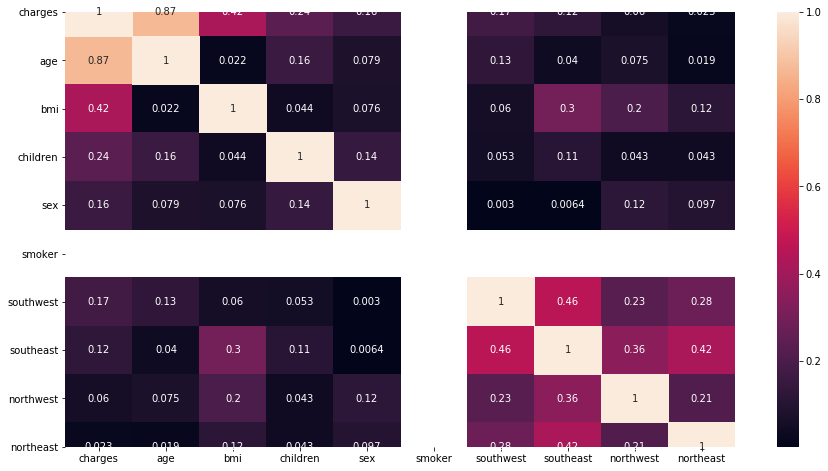

In [736]:
correlationMatrix = df_h.corr().abs()

plt.subplots(figsize=(15, 8))
sb.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sb.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

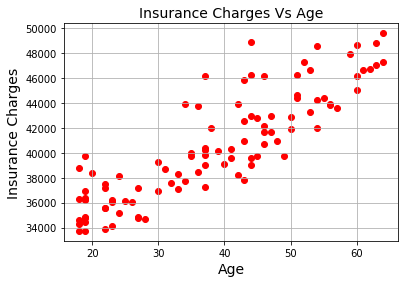

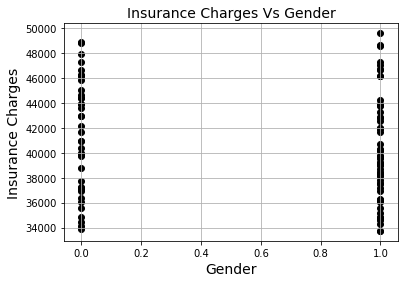

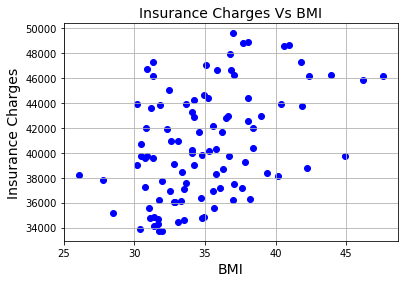

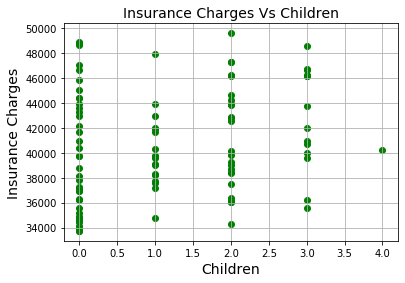

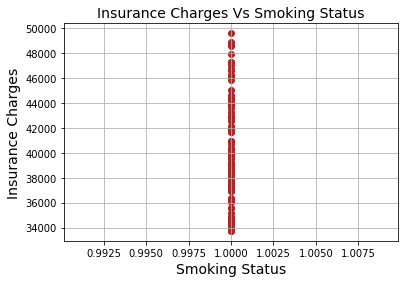

In [737]:
plt.scatter(df_h['age'], df_h['charges'], color='red')
plt.title('Insurance Charges Vs Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_h['sex'], df_h['charges'], color='black')
plt.title('Insurance Charges Vs Gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_h['bmi'], df_h['charges'], color='blue')
plt.title('Insurance Charges Vs BMI', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_h['children'], df_h['charges'], color='green')
plt.title('Insurance Charges Vs Children', fontsize=14)
plt.xlabel('Children', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_h['smoker'], df_h['charges'], color='brown')
plt.title('Insurance Charges Vs Smoking Status', fontsize=14)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

From the above plots, customers with high level of claims (high-coverage) are all smokers. This is consistent with the real world context as smokers require higher coverage and insurance companies charge higher premiums to smokers. For this class of customers (smokers),we can build a linear regression model using age, bmi and number of children as a regressors as they have a 
linear relationship with insurance charges. The criteria would be linear correlation of >=0.2 to be selected as included in the linear regression model.

In [738]:
import statsmodels.api as sm
x_train_high_lin = sm.add_constant(x_train_high[['age','bmi','children']]) # add a constant
model_high_cov = sm.OLS(x_train_high['charges'], x_train_high_lin).fit()
print_model = model_high_cov.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     405.1
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           5.58e-54
Time:                        16:33:22   Log-Likelihood:                -839.17
No. Observations:                  99   AIC:                             1686.
Df Residuals:                      95   BIC:                             1697.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.47e+04   1103.184     13.327      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [739]:
#show plots for mid coverage claims.
df_m=x_train_mid[['charges','age','bmi','children','sex','smoker','southwest','southeast','northwest','northeast']]

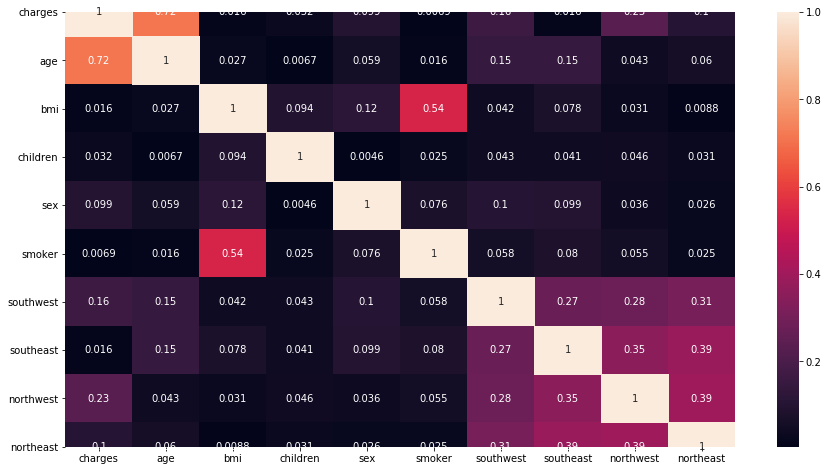

In [740]:
correlationMatrix = df_m.corr().abs()

plt.subplots(figsize=(15, 8))
sb.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sb.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

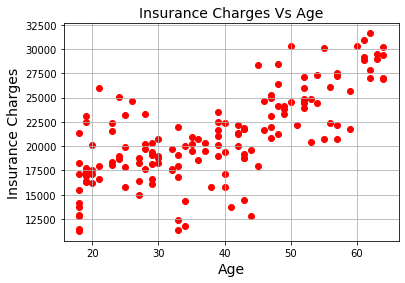

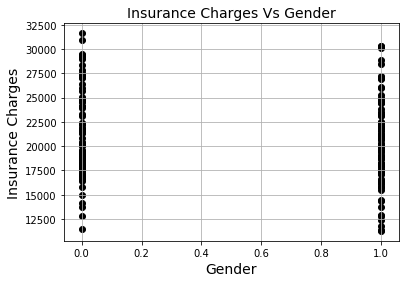

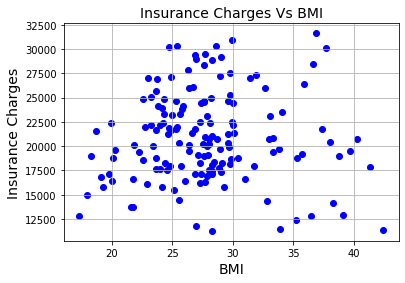

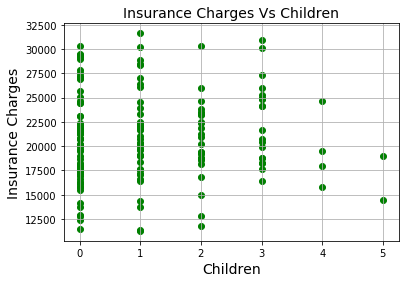

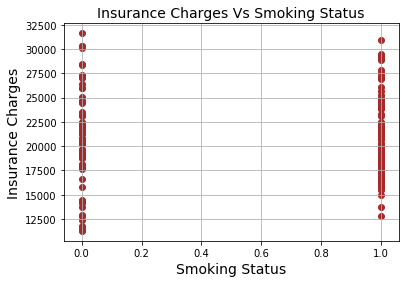

In [741]:
plt.scatter(df_m['age'], df_m['charges'], color='red')
plt.title('Insurance Charges Vs Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_m['sex'], df_m['charges'], color='black')
plt.title('Insurance Charges Vs Gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_m['bmi'], df_m['charges'], color='blue')
plt.title('Insurance Charges Vs BMI', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_m['children'], df_m['charges'], color='green')
plt.title('Insurance Charges Vs Children', fontsize=14)
plt.xlabel('Children', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_m['smoker'], df_m['charges'], color='brown')
plt.title('Insurance Charges Vs Smoking Status', fontsize=14)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

For this class of customers (mid-coverage), age has the highest correlation with insurance claims amount. Staying in northwest also appears to be weakly positively correlated with insurance charge.
We select age and northwest to be the regressors. 

In [742]:
x_train_mid_lin = sm.add_constant(x_train_mid[['age','northwest']]) # add a constant
model_mid_cov = sm.OLS(x_train_mid['charges'], x_train_mid_lin).fit()
print_model = model_mid_cov.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     92.55
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           7.48e-27
Time:                        16:33:24   Log-Likelihood:                -1435.5
No. Observations:                 152   AIC:                             2877.
Df Residuals:                     149   BIC:                             2886.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.148e+04    740.683     15.503      0.0

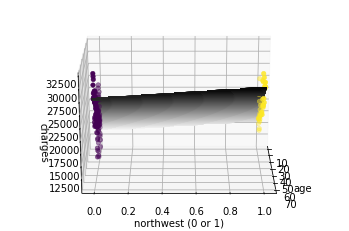

In [743]:
from mpl_toolkits import mplot3d

def f(x, y):
    return x*model_mid_cov.params[1] +  y*model_mid_cov.params[2]+ model_mid_cov.params[0]

x = np.linspace(10, 70, 30)

y = np.array([1]*15 + [0]*15)
np.random.shuffle(y)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()

ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.scatter(x_train_mid['age'], x_train_mid['northwest'], x_train_mid['charges'], 
           c=x_train_mid['northwest'], cmap='viridis', linewidth=0.5);
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('age')
ax.set_ylabel('northwest (0 or 1)')
ax.set_zlabel('charges');
ax.view_init(20, 0)


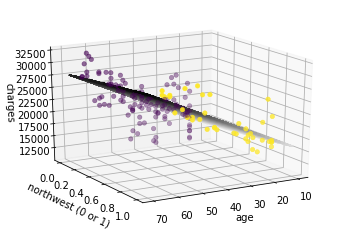

In [744]:
ax.view_init(20, 60)
fig

In [745]:
#show plots for low coverage claims.
df_l=x_train_low[['charges','age','bmi','children','sex','smoker','southwest','southeast','northwest','northeast']]

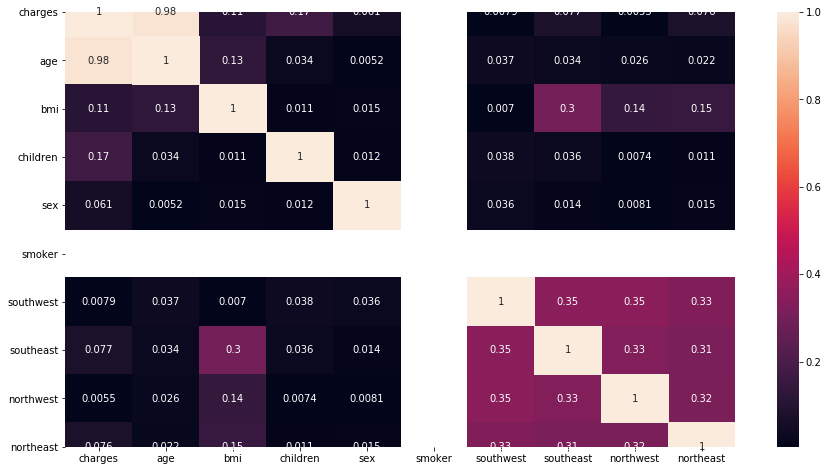

In [746]:
correlationMatrix = df_l.corr().abs()

plt.subplots(figsize=(15, 8))
sb.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sb.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

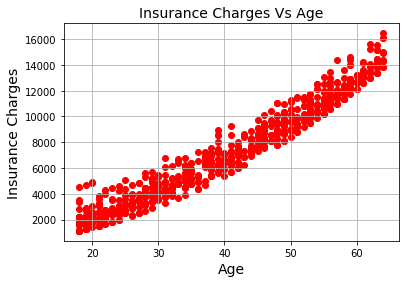

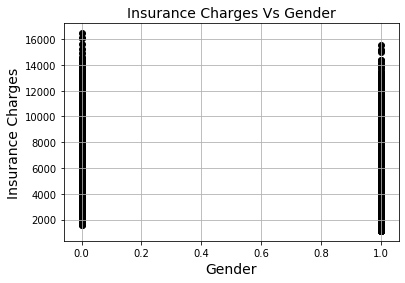

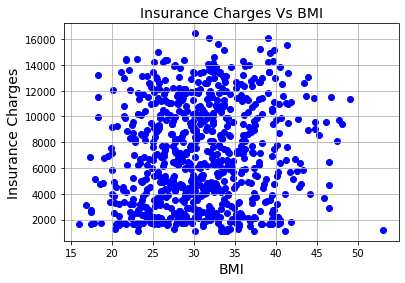

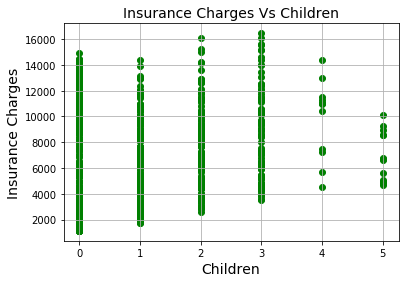

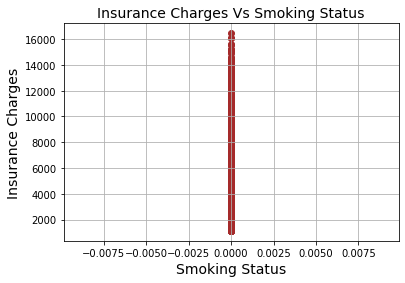

In [747]:
plt.scatter(df_l['age'], df_l['charges'], color='red')
plt.title('Insurance Charges Vs Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_l['sex'], df_l['charges'], color='black')
plt.title('Insurance Charges Vs Gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_l['bmi'], df_l['charges'], color='blue')
plt.title('Insurance Charges Vs BMI', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_l['children'], df_l['charges'], color='green')
plt.title('Insurance Charges Vs Children', fontsize=14)
plt.xlabel('Children', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_l['smoker'], df_l['charges'], color='brown')
plt.title('Insurance Charges Vs Smoking Status', fontsize=14)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

Age has strong correlation with insurance charges. The relationship is non-linear, but can be linearized by squaring age. We select age^2 to be independent variable. 
All the low insurance claims are made by non-smokers.

In [748]:
x_train_low_lin = sm.add_constant(x_train_low[['age']]) # add a constant
model_low_cov = sm.OLS(x_train_low['charges'], x_train_low_lin).fit()
print_model = model_low_cov.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.525e+04
Date:                Sat, 09 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:33:26   Log-Likelihood:                -5983.5
No. Observations:                 734   AIC:                         1.197e+04
Df Residuals:                     732   BIC:                         1.198e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3542.0628     91.810    -38.580      0.0

      const  age
1075    1.0   32
131     1.0   61
15      1.0   19
825     1.0   64
1137    1.0   26
...     ...  ...
764     1.0   45
836     1.0   36
1217    1.0   29
559     1.0   19
685     1.0   53

[734 rows x 2 columns]
      const   age
1075    1.0  1024
131     1.0  3721
15      1.0   361
825     1.0  4096
1137    1.0   676
...     ...   ...
764     1.0  2025
836     1.0  1296
1217    1.0   841
559     1.0   361
685     1.0  2809

[734 rows x 2 columns]


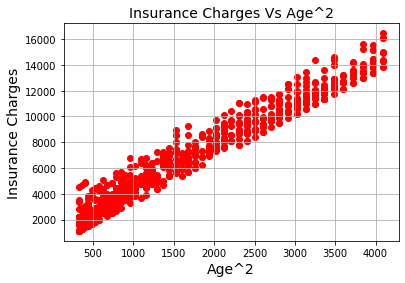

In [749]:
x_train_low_lin = sm.add_constant(x_train_low[['age']]) # add a constant
# square Age
print(x_train_low_lin)
x_train_low_lin['age']=x_train_low_lin['age'].values**2
print(x_train_low_lin)

plt.scatter(x_train_low_lin['age'], x_train_low['charges'], color='red')
plt.title('Insurance Charges Vs Age^2', fontsize=14)
plt.xlabel('Age^2', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()


In [750]:
model_low_cov = sm.OLS(x_train_low['charges'], x_train_low_lin).fit()
print_model = model_low_cov.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.698e+04
Date:                Sat, 09 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:33:26   Log-Likelihood:                -5945.8
No. Observations:                 734   AIC:                         1.190e+04
Df Residuals:                     732   BIC:                         1.190e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1167.2136     54.419     21.449      0.0

Slight improvement in adjusted R2 when we use age^2 as independent variable. No issue of multicollinearity as there is only 1 independent variable.

With the regression model trained for each of the 3 classes of customers, we can test the models using x_test.
First, we have to classify the data to determine which of the 3 regression model to use i.e. model_high_cov,model_mid_cov or model_low_cov using logistic regression. We have labelled the data into the respective clusters : 0,1,2 (low,mid,high-cov) in x_train

In [751]:
x_train.head()

,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast,Cluster,charges
1075,32,0,29.590,1,0,0,1,0,0,0,4562.84210
131,61,0,22.040,0,0,0,0,0,1,0,13616.35860
15,19,1,24.600,1,0,1,0,0,0,0,1837.23700
825,64,0,31.825,2,0,0,0,0,1,0,16069.08475
1137,26,0,22.230,0,0,0,0,1,0,0,3176.28770


In [752]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 1075 to 685
Data columns (total 11 columns):
age          985 non-null int64
sex          985 non-null int64
bmi          985 non-null float64
children     985 non-null int64
smoker       985 non-null int64
southwest    985 non-null int32
southeast    985 non-null int32
northwest    985 non-null int32
northeast    985 non-null int32
Cluster      985 non-null int64
charges      985 non-null float64
dtypes: float64(2), int32(4), int64(5)
memory usage: 77.0 KB


In [753]:
from sklearn.linear_model import LogisticRegression

#x = x_train[['age','sex','children','bmi','smoker','southwest','southeast','northwest','northeast']]
#x = x_train[['children','bmi','smoker','southwest','southeast','northwest','northeast']]
x = x_train[['bmi','smoker']] 
# through trial and error, only these 2 are important for classifying, which makes sense since 
# the insurance charge(claim) amount will depend on how healthy a person is, indicated by bmi and smoking habits.
y = x_train['Cluster']    # Classification : 0,1,2

x_train_logReg, x_test_logReg, y_train_logReg, y_test_logReg = train_test_split(x, y, random_state = 0)
logReg = LogisticRegression(solver = 'lbfgs',multi_class='multinomial',random_state=0,max_iter=2000)

In [754]:
x_train_logReg.head()

,bmi,smoker
155,39.52,0
639,33.66,0
1066,37.29,0
1051,26.41,0
700,34.87,0


In [755]:
x_train_logReg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 155 to 1245
Data columns (total 2 columns):
bmi       738 non-null float64
smoker    738 non-null int64
dtypes: float64(1), int64(1)
memory usage: 17.3 KB


In [756]:
logReg.fit(x_train_logReg, y_train_logReg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [757]:
from sklearn.metrics import accuracy_score

y_pred_logReg = logReg.predict(x_test_logReg)
print(y_test_logReg)
print(y_pred_logReg)
print(accuracy_score(y_test_logReg, y_pred_logReg))

738     2
1148    0
959     1
502     1
889     0
       ..
534     0
1201    0
57      2
716     0
782     0
Name: Cluster, Length: 247, dtype: int64
[2 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 2 0 1 0 2 2
 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 2 0 2 0 0 0 1 0 0 1 0 1 1 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 1 0 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 2 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 2 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 2 0 0]
0.9149797570850202


Try classifying using KNN classifier.

In [758]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors = k) 

    knn_model.fit(x_train_logReg, y_train_logReg)

    y_predict_knn = knn_model.predict(x_test_logReg)

    print(k,accuracy_score(y_test_logReg, y_predict_knn))

1 0.8623481781376519
2 0.9149797570850202
3 0.8987854251012146
4 0.9109311740890689
5 0.9149797570850202
6 0.9109311740890689
7 0.9109311740890689
8 0.902834008097166
9 0.902834008097166
10 0.8947368421052632
11 0.902834008097166
12 0.902834008097166
13 0.902834008097166
14 0.902834008097166
15 0.902834008097166
16 0.902834008097166
17 0.902834008097166
18 0.902834008097166
19 0.902834008097166
20 0.902834008097166


K-NN is worse at classifying insurance charges (claims) compared to logistic regression. Use logistic regression.

With x_test, first we use the logistic regression model to classify the data into cluster 0,1, or 2.
Next, we predict the insurance charge according to the corresponding regression model for the cluster.

In [759]:
x_test.head(20)

,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast
1248,18,0,39.820,0,0,0,1,0,0
610,47,0,29.370,1,0,0,1,0,0
393,49,1,31.350,1,0,0,0,0,1
503,19,1,30.250,0,1,0,1,0,0
198,51,0,18.050,0,0,0,0,1,0
821,26,1,17.670,0,0,0,0,1,0
31,18,0,26.315,0,0,0,0,0,1
1251,19,1,19.800,0,0,1,0,0,0
1299,19,0,25.745,1,0,0,0,1,0
1151,58,0,36.480,0,0,0,0,1,0


In [760]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 1248 to 635
Data columns (total 9 columns):
age          335 non-null int64
sex          335 non-null int64
bmi          335 non-null float64
children     335 non-null int64
smoker       335 non-null int64
southwest    335 non-null int32
southeast    335 non-null int32
northwest    335 non-null int32
northeast    335 non-null int32
dtypes: float64(1), int32(4), int64(4)
memory usage: 20.9 KB


In [761]:
x_test[['bmi','smoker']]

,bmi,smoker
1248,39.82,0
610,29.37,0
393,31.35,0
503,30.25,1
198,18.05,0
...,...,...
824,24.32,0
970,28.16,0
1327,30.03,0
793,20.90,1


In [762]:
y_pred_cluster = logReg.predict(x_test[['bmi','smoker']])
x_test_ori=x_test
x_test

,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast
1248,18,0,39.82,0,0,0,1,0,0
610,47,0,29.37,1,0,0,1,0,0
393,49,1,31.35,1,0,0,0,0,1
503,19,1,30.25,0,1,0,1,0,0
198,51,0,18.05,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
824,60,1,24.32,0,0,0,0,1,0
970,50,0,28.16,3,0,0,1,0,0
1327,51,1,30.03,1,0,0,1,0,0
793,53,1,20.90,0,1,0,1,0,0


In [763]:
x_test['Cluster']=y_pred_cluster

In [764]:
x_test

,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast,Cluster
1248,18,0,39.82,0,0,0,1,0,0,0
610,47,0,29.37,1,0,0,1,0,0,0
393,49,1,31.35,1,0,0,0,0,1,0
503,19,1,30.25,0,1,0,1,0,0,1
198,51,0,18.05,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
824,60,1,24.32,0,0,0,0,1,0,0
970,50,0,28.16,3,0,0,1,0,0,0
1327,51,1,30.03,1,0,0,1,0,0,0
793,53,1,20.90,0,1,0,1,0,0,1


In [765]:
# for high_cov which is cluster 2
#x_train_high_lin = sm.add_constant(x_train_high[['age','bmi','children']]) # add a constant
# model_high_cov = sm.OLS(x_train_high['charges'], x_train_high_lin).fit()

# for mid_cov which is cluster 1
# x_train_mid_lin = sm.add_constant(x_train_mid[['age','northwest']]) # add a constant
# model_mid_cov = sm.OLS(x_train_mid['charges'], x_train_mid_lin).fit()

# for mid_cov which is cluster 0
# x_train_low_lin = sm.add_constant(x_train_low[['age']]) # add a constant
# model_low_cov = sm.OLS(x_train_low['charges'], x_train_low_lin).fit()

x_test_cluster0=x_test[x_test['Cluster']==0]
print(x_test_cluster0.head())
x_test_cluster1=x_test[x_test['Cluster']==1]
print(x_test_cluster1.head())
x_test_cluster2=x_test[x_test['Cluster']==2]
print(x_test_cluster2.head())

      age  sex    bmi  children  smoker  southwest  southeast  northwest  \
1248   18    0  39.82         0       0          0          1          0   
610    47    0  29.37         1       0          0          1          0   
393    49    1  31.35         1       0          0          0          0   
198    51    0  18.05         0       0          0          0          1   
821    26    1  17.67         0       0          0          0          1   

      northeast  Cluster  
1248          0        0  
610           0        0  
393           1        0  
198           0        0  
821           0        0  
      age  sex     bmi  children  smoker  southwest  southeast  northwest  \
503    19    1  30.250         0       1          0          1          0   
1274   26    1  27.060         0       1          0          1          0   
989    24    0  20.520         0       1          0          0          0   
966    51    1  24.795         2       1          0          0          1

In [766]:
print(x_test_cluster0['age'])
x_test_cluster0['age']=x_test_cluster0['age'].values**2
print(x_test_cluster0['age'])
x_test_cluster0_c = sm.add_constant(x_test_cluster0['age'])
y_predict_low_cov=model_low_cov.predict(x_test_cluster0_c)

1248    18
610     47
393     49
198     51
821     26
        ..
1220    30
824     60
970     50
1327    51
635     64
Name: age, Length: 262, dtype: int64
1248     324
610     2209
393     2401
198     2601
821      676
        ... 
1220     900
824     3600
970     2500
1327    2601
635     4096
Name: age, Length: 262, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [767]:
x_test_cluster1_c = sm.add_constant(x_test_cluster1[['age','northwest']])
y_predict_mid_cov=model_mid_cov.predict(x_test_cluster1_c)

In [768]:
x_test_cluster2_c = sm.add_constant(x_test_cluster2[['age','bmi','children']])
y_predict_high_cov=model_high_cov.predict(x_test_cluster2_c)

In [769]:
y_test

1248     1633.9618
610      8547.6913
393      9290.1395
503     32548.3405
198      9644.2525
           ...    
824     12523.6048
970     10702.6424
1327     9377.9047
793     21195.8180
635     14410.9321
Name: charges, Length: 335, dtype: float64

In [770]:
y_predict_low_cov

1248     2255.055309
610      8584.010811
393      9228.657737
198      9900.164952
821      3436.908007
            ...     
1220     4188.996088
824     13254.343492
970      9561.053809
1327     9900.164952
635     14919.681385
Length: 262, dtype: float64

In [771]:
y_predict_mid_cov

503     15912.127797
1274    17543.995353
989     17077.747480
966     25488.650866
52      22672.721959
1282    15679.003860
142     19408.986846
412     17543.995353
1321    25936.457072
1306    18243.367163
818     22439.598022
85      24089.907246
224     21273.978339
58      23838.341642
1281    24556.155120
362     15912.127797
1196    18028.684894
92      25237.085262
1307    21059.296070
156     22672.721959
982     18709.615036
1223    16145.251733
593     16378.375670
730     19642.110783
1179    18709.615036
474     24071.465579
896     21507.102276
465     18476.491100
1308    17310.871417
70      17777.119290
1171    21507.102276
795     19893.676387
64      18261.808830
1000    20593.048197
793     23838.341642
dtype: float64

In [772]:
y_predict_high_cov

1186    36552.577465
951     47604.794637
34      38334.223778
1042    33382.824808
55      46868.663836
161     35540.512885
725     40697.153443
569     45791.351218
298     38930.518651
1022    43232.124876
958     41683.294604
381     42662.285007
19      38046.241356
53      39257.685546
1146    44910.063189
312     42800.928617
39      48005.666581
322     37144.748943
14      40228.742316
254     41833.688380
1001    35321.875508
1284    47039.829060
1070    41012.491006
530     48521.202109
1124    39777.189641
1047    43797.946903
420     46441.453442
1062    48619.816504
1267    34609.014727
893     44817.723008
251     46121.118735
668     45098.057682
240     37464.943501
49      39932.042679
667     40273.888022
330     47076.889101
500     37388.713492
328     46745.210169
dtype: float64

In [773]:
y_predict=y_predict_low_cov.append(y_predict_mid_cov.append(y_predict_high_cov))

In [774]:
y_predict

1248     2255.055309
610      8584.010811
393      9228.657737
198      9900.164952
821      3436.908007
            ...     
49      39932.042679
667     40273.888022
330     47076.889101
500     37388.713492
328     46745.210169
Length: 335, dtype: float64

In [775]:
y_test

1248     1633.9618
610      8547.6913
393      9290.1395
503     32548.3405
198      9644.2525
           ...    
824     12523.6048
970     10702.6424
1327     9377.9047
793     21195.8180
635     14410.9321
Name: charges, Length: 335, dtype: float64

In [776]:
y_predict=y_predict.reindex(y_test.index)

In [777]:
y_predict

1248     2255.055309
610      8584.010811
393      9228.657737
503     15912.127797
198      9900.164952
            ...     
824     13254.343492
970      9561.053809
1327     9900.164952
793     23838.341642
635     14919.681385
Length: 335, dtype: float64

In [778]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse=mean_squared_error(y_test, y_predict)
mse

27623339.224602953

In [779]:
rms = sqrt(mean_squared_error(y_test, y_predict))
rms #root mean square error

5255.791017972742

By first classifying the data into low,mid, and high-coverage classes and then applying the corresponding regression model suitable for the particular class, we manage to reduce the root-mean-square-error giving better prediction of insurance charge (claim).